## Імпорт бібілотек

In [1]:
import tensorflow
import matplotlib.pyplot as plt
from DE import *

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.metrics import TopKCategoricalAccuracy

from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy

import numpy as np

print(tensorflow.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Підготовка датасету

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

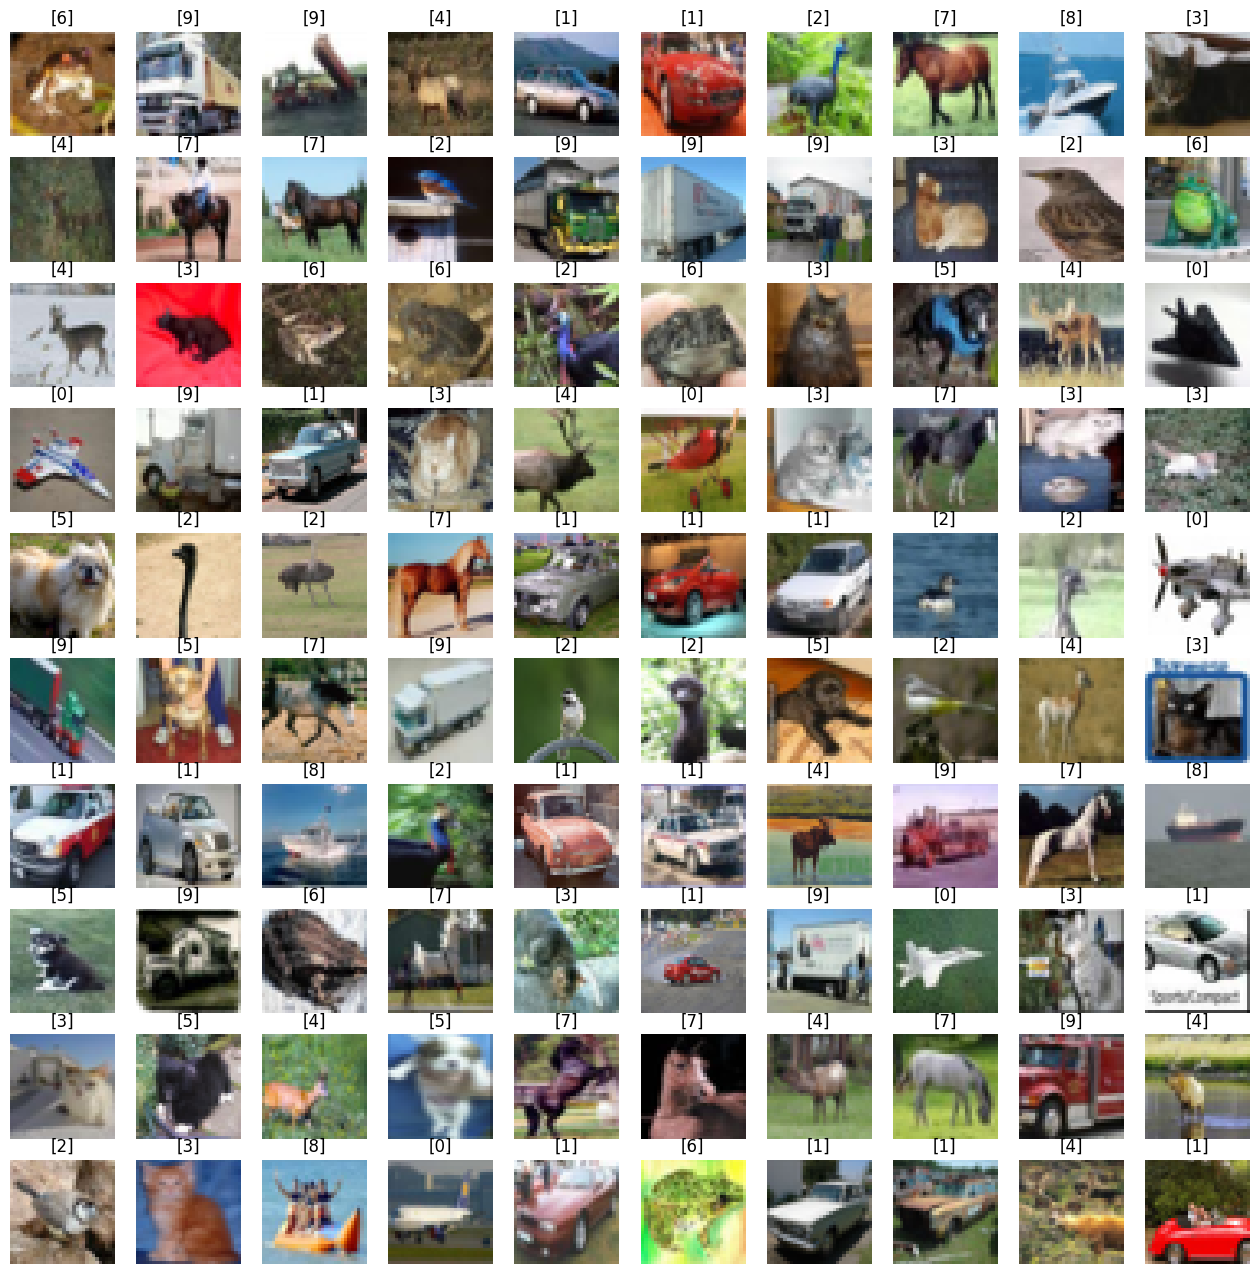

In [3]:
plt.figure(figsize=(16, 16))
for i in range(100):
    ax = plt.subplot(10, 10, i+1)
    plt.imshow(np.array(x_train[i]))
    plt.title(str(y_train[i]))
    plt.axis("off")

In [4]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [5]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
x_valid = x_train[40_000:]
y_valid = y_train[40_000:]

x_train = x_train[:40_000]
y_train = y_train[:40_000]

## Тестова побудова моделі

In [7]:
model = Sequential([
    # Conv2D + BatchNorm + ReLU
    Conv2D(16, (3,3), padding='same', input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Activation('relu'),
    
    # Dense Layers
    Flatten(),
    Dense(128),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.4),
    
    Dense(10, activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 activation (Activation)     (None, 16, 16, 16)        0         
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 128)               5

In [8]:
model.compile(optimizer=Adam(learning_rate=.0001), 
               loss=CategoricalCrossentropy(),
               metrics=['accuracy', TopKCategoricalAccuracy(k=2, name="Top2")])

In [9]:
history = model.fit(x_train, y_train, batch_size=256, 
                     epochs=10, validation_data=(x_valid, y_valid), 
                     verbose=0)

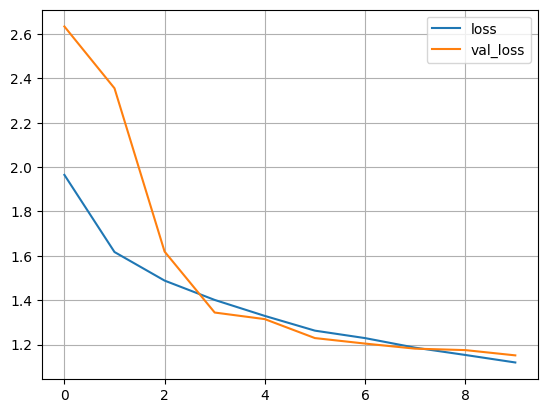

In [10]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
# plt.xticks(list(range(50)))
plt.grid()

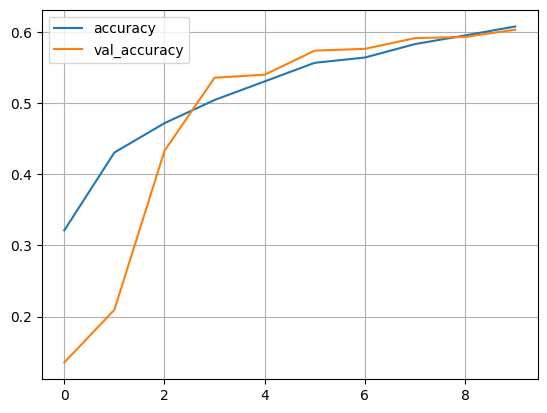

In [11]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.grid()

In [12]:
model.evaluate(x_test, y_test, verbose=0)

[1.1505296230316162, 0.5914999842643738, 0.7814000248908997]

In [13]:
# import tensorflow as tf
# gpus = tf.config.list_physical_devices('GPU')
# if gpus:
#     try:
#         for gpu in gpus:
#             tf.config.experimental.set_memory_growth(gpu, True)
#     except RuntimeError as e:
#         print(e)

In [14]:
# from numba import cuda 
# device = cuda.get_current_device()
# device.reset()

In [15]:
def f(vec):
    conv1_N = np.round(vec[0])
    dropout_1 = np.round(vec[1])
    dropout_2 = np.round(vec[2])
    
    model = Sequential([
        # Conv2D + BatchNorm + ReLU
        Conv2D(conv1_N, (3,3), padding='same', input_shape=(32,32,3)),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Dropout(dropout_1),
        Activation('relu'),
        
        # Dense Layers
        Flatten(),
        Dense(128),
        BatchNormalization(),
        Activation('relu'),
        Dropout(dropout_2),
        
        Dense(10, activation='softmax'),
        ])
    model.compile(optimizer=Adam(learning_rate=.0001), 
                  loss=CategoricalCrossentropy(), 
                  metrics=['accuracy', TopKCategoricalAccuracy(k=2, name="Top2")])
    model.fit(x_train, y_train, batch_size=256, epochs=10, 
              validation_data=(x_valid, y_valid), verbose=0)
    # device.reset()
    return model.evaluate(x_test, y_test, verbose=0)[1]

In [16]:
f([32, 0.25, 0.5])

0.6276000142097473

In [17]:
de_positions, de_values = differential_evolution(f, np.array([[16, 32], [0.01, 0.5], [0.01, 0.5]]), max_iter=40)

In [18]:
de_positions

[array([3.20000000e+01, 9.71637699e-02, 1.00000000e-02]),
 array([3.20000000e+01, 9.71637699e-02, 1.00000000e-02]),
 array([3.20000000e+01, 9.71637699e-02, 1.00000000e-02]),
 array([3.20000000e+01, 9.71637699e-02, 1.00000000e-02]),
 array([3.2e+01, 1.0e-02, 1.0e-02]),
 array([3.2e+01, 1.0e-02, 1.0e-02]),
 array([3.2e+01, 1.0e-02, 1.0e-02]),
 array([3.2e+01, 1.0e-02, 1.0e-02]),
 array([3.2e+01, 1.0e-02, 1.0e-02]),
 array([3.2e+01, 1.0e-02, 1.0e-02]),
 array([3.2e+01, 1.0e-02, 1.0e-02]),
 array([3.2e+01, 1.0e-02, 1.0e-02]),
 array([3.2e+01, 1.0e-02, 1.0e-02]),
 array([3.2e+01, 1.0e-02, 1.0e-02]),
 array([3.2e+01, 1.0e-02, 1.0e-02]),
 array([3.2e+01, 1.0e-02, 1.0e-02]),
 array([3.2e+01, 1.0e-02, 1.0e-02]),
 array([3.2e+01, 1.0e-02, 1.0e-02]),
 array([3.2e+01, 1.0e-02, 1.0e-02]),
 array([3.2e+01, 1.0e-02, 1.0e-02]),
 array([3.2e+01, 1.0e-02, 1.0e-02]),
 array([3.2e+01, 1.0e-02, 1.0e-02]),
 array([3.2e+01, 1.0e-02, 1.0e-02]),
 array([3.2e+01, 1.0e-02, 1.0e-02]),
 array([3.2e+01, 1.0e-02, 1.

In [19]:
de_values

[0.6444000005722046,
 0.6444000005722046,
 0.6444000005722046,
 0.6444000005722046,
 0.6485999822616577,
 0.6485999822616577,
 0.6485999822616577,
 0.6485999822616577,
 0.6485999822616577,
 0.6485999822616577,
 0.6485999822616577,
 0.6485999822616577,
 0.6485999822616577,
 0.6485999822616577,
 0.6485999822616577,
 0.6485999822616577,
 0.6485999822616577,
 0.6485999822616577,
 0.6485999822616577,
 0.6485999822616577,
 0.6485999822616577,
 0.6485999822616577,
 0.6485999822616577,
 0.6485999822616577,
 0.6485999822616577,
 0.6485999822616577,
 0.6485999822616577,
 0.6485999822616577,
 0.6485999822616577,
 0.6485999822616577,
 0.6485999822616577,
 0.6485999822616577,
 0.6485999822616577,
 0.6485999822616577,
 0.6485999822616577,
 0.6485999822616577,
 0.6485999822616577,
 0.6485999822616577,
 0.6485999822616577,
 0.6500999927520752]

### Перша модель

In [34]:
start_model = Sequential([
    # Conv2D + BatchNorm + ReLU
    Conv2D(32, (3,3), padding='same', input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.00971637699),
    Activation('relu'),
    
    # Dense Layers
    Flatten(),
    Dense(128),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.01),
    
    Dense(10, activation='softmax'),
    ])
start_model.compile(optimizer=Adam(learning_rate=.0001), 
                    loss=CategoricalCrossentropy(), 
                    metrics=['accuracy', TopKCategoricalAccuracy(k=2, name="Top2")])

In [35]:
h_sm = start_model.fit(x_train, y_train, batch_size=256, epochs=20, 
                       validation_data=(x_valid, y_valid))

Epoch 1/20
157/157 [==============================] - 2s 8ms/step - loss: 1.5832 - accuracy: 0.4487 - Top2: 0.6450 - val_loss: 2.8154 - val_accuracy: 0.1187 - val_Top2: 0.3170
Epoch 2/20
157/157 [==============================] - 1s 6ms/step - loss: 1.2469 - accuracy: 0.5721 - Top2: 0.7605 - val_loss: 2.5913 - val_accuracy: 0.2392 - val_Top2: 0.4135
Epoch 3/20
157/157 [==============================] - 1s 6ms/step - loss: 1.1032 - accuracy: 0.6255 - Top2: 0.8021 - val_loss: 1.7345 - val_accuracy: 0.4082 - val_Top2: 0.5882
Epoch 4/20
157/157 [==============================] - 1s 6ms/step - loss: 1.0000 - accuracy: 0.6667 - Top2: 0.8342 - val_loss: 1.2479 - val_accuracy: 0.5576 - val_Top2: 0.7524
Epoch 5/20
157/157 [==============================] - 1s 6ms/step - loss: 0.9240 - accuracy: 0.6941 - Top2: 0.8523 - val_loss: 1.1418 - val_accuracy: 0.5998 - val_Top2: 0.7835
Epoch 6/20
157/157 [==============================] - 1s 6ms/step - loss: 0.8538 - accuracy: 0.7237 - Top2: 0.8711 - val

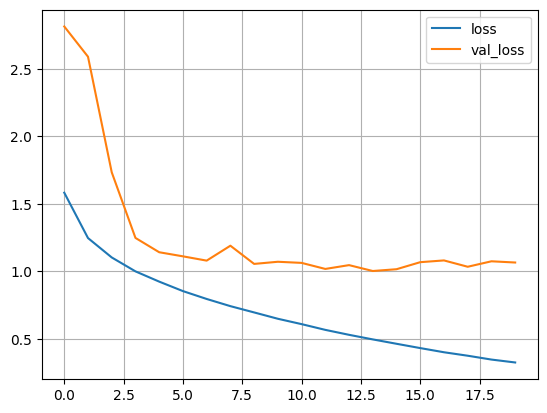

In [36]:
plt.plot(h_sm.history["loss"], label="loss")
plt.plot(h_sm.history["val_loss"], label="val_loss")
plt.legend()
plt.grid()

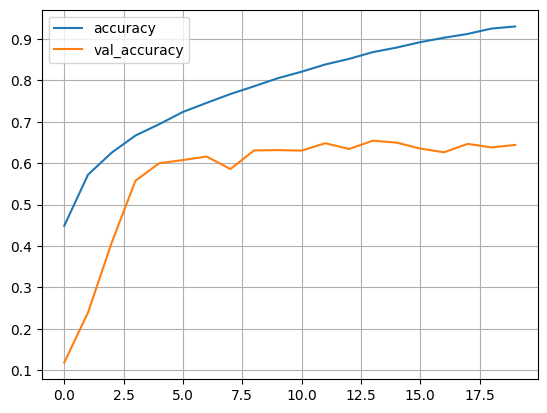

In [37]:
plt.plot(h_sm.history["accuracy"], label="accuracy")
plt.plot(h_sm.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.grid()

In [38]:
start_model.evaluate(x_test, y_test, verbose=0)

[1.0751553773880005, 0.6431000232696533, 0.8151999711990356]

In [55]:
start_model.save("start_model.keras")

### Остання (покарщенні параметри) модель

In [49]:
last_model = Sequential([
    # Conv2D + BatchNorm + ReLU
    Conv2D(32, (3,3), padding='same', input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.113580684),
    Activation('relu'),
    
    # Dense Layers
    Flatten(),
    Dense(128),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.01),
    
    Dense(10, activation='softmax'),
    ])
last_model.compile(optimizer=Adam(learning_rate=.0001), 
                   loss=CategoricalCrossentropy(), 
                   metrics=['accuracy', TopKCategoricalAccuracy(k=2, name="Top2")])

In [50]:
h_lm = last_model.fit(x_train, y_train, batch_size=256, epochs=20, 
                      validation_data=(x_valid, y_valid))

Epoch 1/20
157/157 [==============================] - 2s 8ms/step - loss: 1.6802 - accuracy: 0.4193 - Top2: 0.6158 - val_loss: 2.7759 - val_accuracy: 0.1297 - val_Top2: 0.2080
Epoch 2/20
157/157 [==============================] - 1s 6ms/step - loss: 1.3519 - accuracy: 0.5318 - Top2: 0.7253 - val_loss: 2.4801 - val_accuracy: 0.2051 - val_Top2: 0.3157
Epoch 3/20
157/157 [==============================] - 1s 6ms/step - loss: 1.2219 - accuracy: 0.5804 - Top2: 0.7657 - val_loss: 1.6482 - val_accuracy: 0.4097 - val_Top2: 0.5953
Epoch 4/20
157/157 [==============================] - 1s 6ms/step - loss: 1.1313 - accuracy: 0.6123 - Top2: 0.7957 - val_loss: 1.2903 - val_accuracy: 0.5418 - val_Top2: 0.7377
Epoch 5/20
157/157 [==============================] - 1s 6ms/step - loss: 1.0604 - accuracy: 0.6417 - Top2: 0.8128 - val_loss: 1.1426 - val_accuracy: 0.6097 - val_Top2: 0.7897
Epoch 6/20
157/157 [==============================] - 1s 6ms/step - loss: 0.9999 - accuracy: 0.6653 - Top2: 0.8320 - val

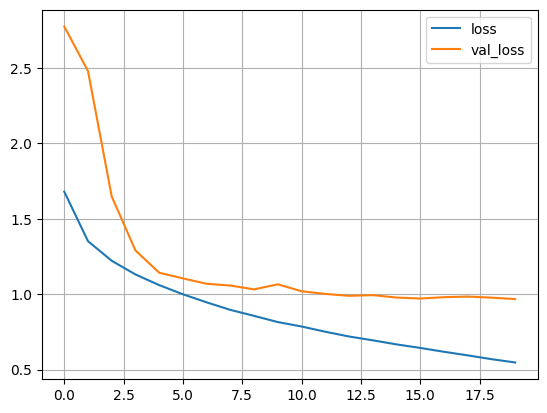

In [51]:
plt.plot(h_lm.history["loss"], label="loss")
plt.plot(h_lm.history["val_loss"], label="val_loss")
plt.legend()
plt.grid()

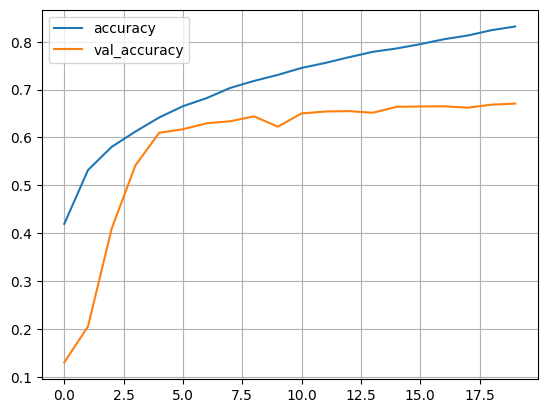

In [52]:
plt.plot(h_lm.history["accuracy"], label="accuracy")
plt.plot(h_lm.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.grid()

In [53]:
last_model.evaluate(x_test, y_test, verbose=0)

[0.9746010899543762, 0.6614000201225281, 0.8345000147819519]

In [54]:
last_model.save("last_model.keras")

## Побудова "ландшафту"

In [30]:
c1n = np.arange(16, 33, 2)
drp1 = np.arange(0.05, 0.51, 0.05)
print(len(c1n), len(drp1))

9 10


In [31]:
def f_for_landshaft(vec):
    c1n = vec[0]
    drp1 = vec[1]
    
    return f([c1n, drp1, 0.25])

In [32]:
result = []
for i in range(len(c1n)):
    result.append([])
    for j in range(len(drp1)):
        result[i].append(f_for_landshaft([c1n[i], drp1[j]]))


Text(0, 0.5, "Значення першого Dropout'а")

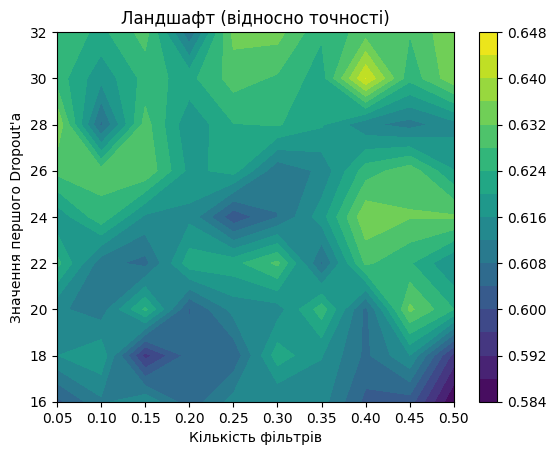

In [33]:
X, Y = np.meshgrid(drp1, c1n)
plt.contourf(X, Y, result, 15)
plt.colorbar()
plt.title("Ландшафт (відносно точності)")
plt.xlabel("Кількість фільтрів")
plt.ylabel("Значення першого Dropout'а")